# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
data_dir = './data'

data_filepath = os.path.join(data_dir, 'IMDB-Movie-Data.csv')

df = pd.read_csv(data_filepath)

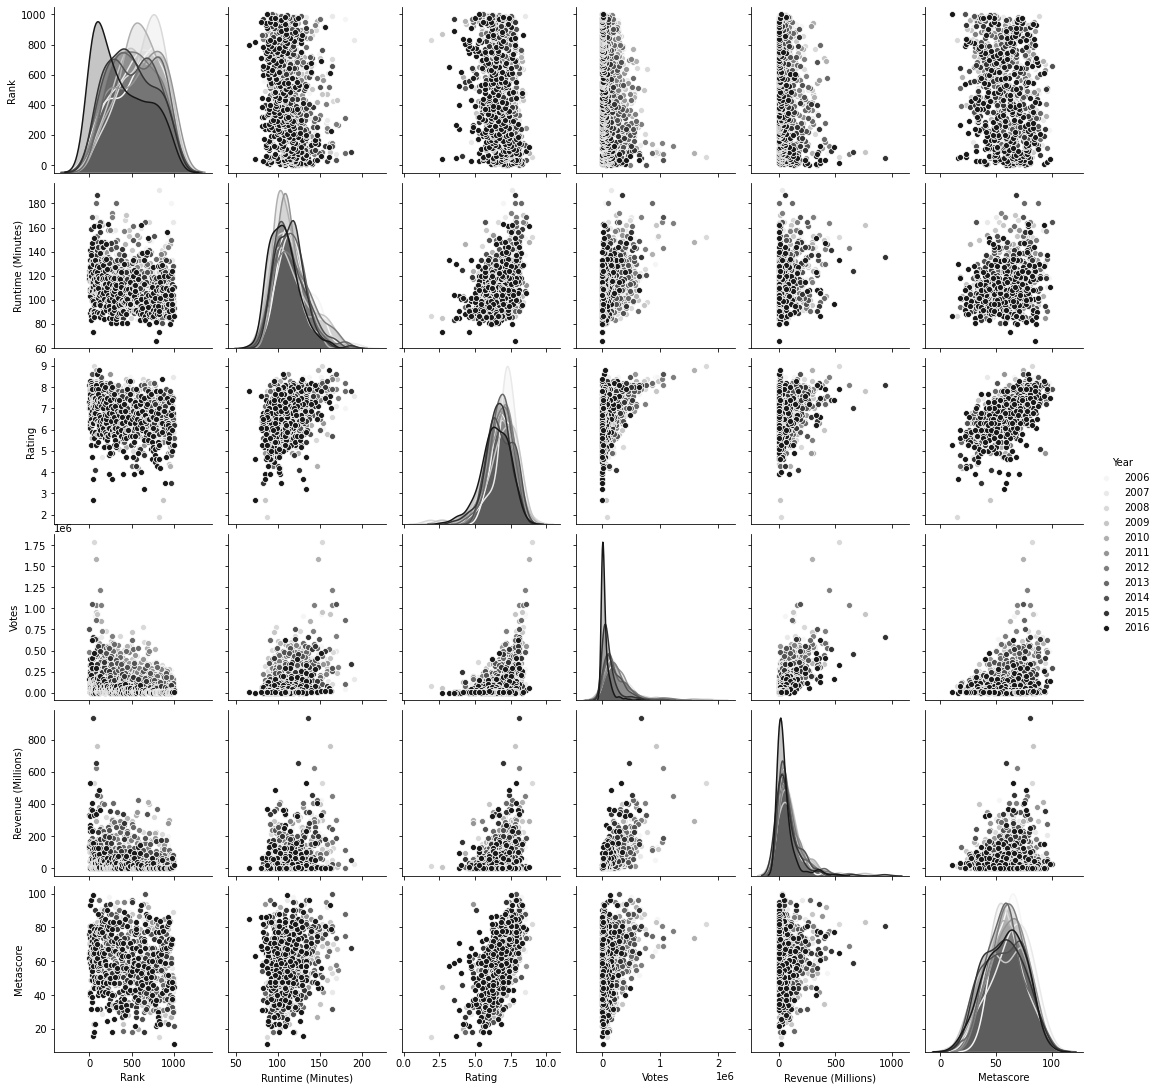

In [16]:
sns.pairplot(df, palette='Greys', hue="Year")

In [4]:
genre_only_df = pd.DataFrame(df.Genre.str.split(',').tolist(), index=df.Title).stack()

genre_only_df = genre_only_df.reset_index([0, 'Title'])

genre_only_df.columns = ['Title', 'Genre']

In [5]:
actors_only_df = pd.DataFrame(df.Actors.str.split(',').tolist(), index=df.Title).stack()

actors_only_df = actors_only_df.reset_index([0, 'Title'])

actors_only_df.columns = ['Title', 'Actor']

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

In [6]:
plt.rcParams['figure.figsize'] = (7, 7)

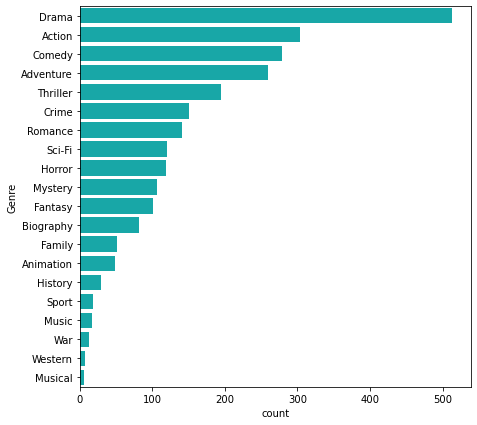

In [7]:
ax = sns.countplot(y="Genre", data=genre_only_df, color='c', order=genre_only_df['Genre'].value_counts().index)

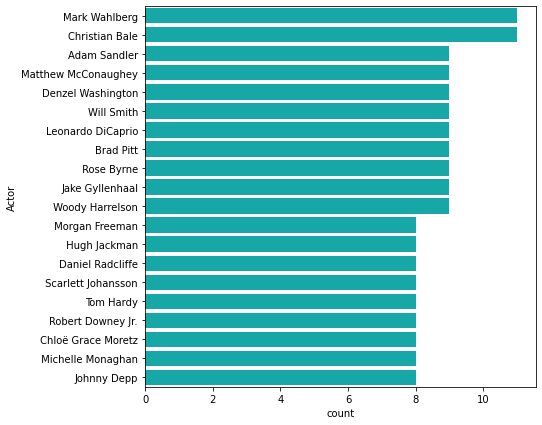

In [8]:
top_10_actors = actors_only_df['Actor'].value_counts().keys()[:20].to_list()

top_10_actor_df = actors_only_df[actors_only_df.Actor.isin(top_10_actors)]

ax = sns.countplot(y=top_10_actor_df['Actor'], color='c',  order=top_10_actor_df['Actor'].value_counts().index)

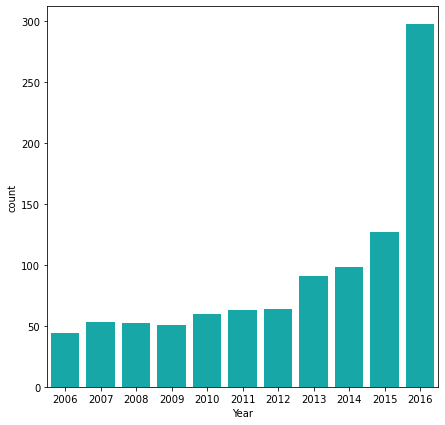

In [9]:
ax = sns.countplot(df['Year'], color='c')

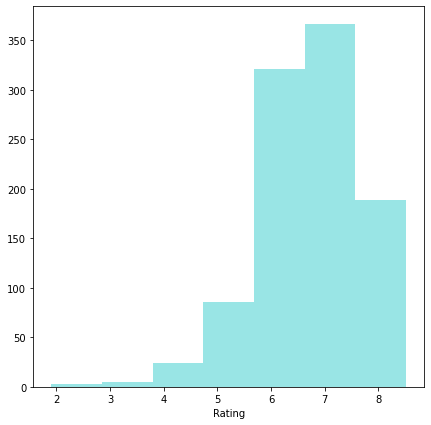

In [10]:
ratings = df['Rating']

bin_edges = np.arange(ratings.min(), ratings.max(), ratings.std())

sns.distplot(df['Rating'], color='c', bins=bin_edges, kde=False)

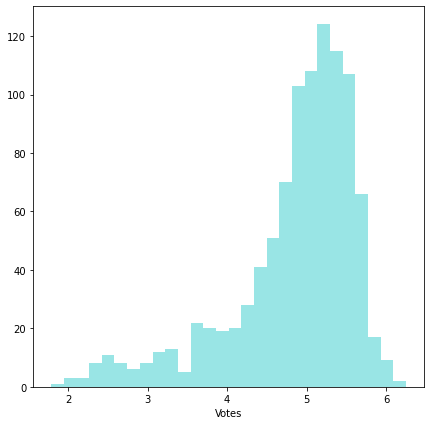

In [14]:
votes = df['Votes']
log_votes = np.log10(votes)

# sns.distplot(votes, color='c', kde=False)

sns.distplot(log_votes, color='c', kde=False)

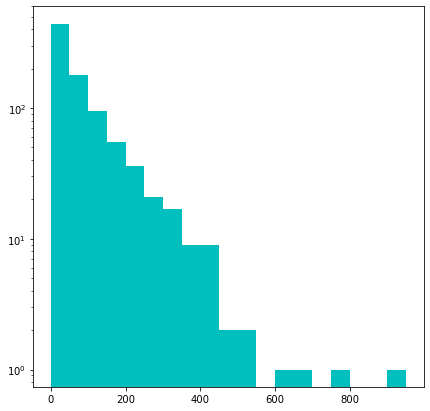

In [12]:
revenues = df['Revenue (Millions)']

bin_edges = np.arange(0, 1000, 50)

plt.hist(revenues, color='c', bins=bin_edges)

plt.yscale('log')

(array([  3.,  78., 256., 268., 208.,  98.,  52.,  26.,   6.,   5.]),
 array([ 66. ,  78.5,  91. , 103.5, 116. , 128.5, 141. , 153.5, 166. ,
        178.5, 191. ]),
 <a list of 10 Patch objects>)

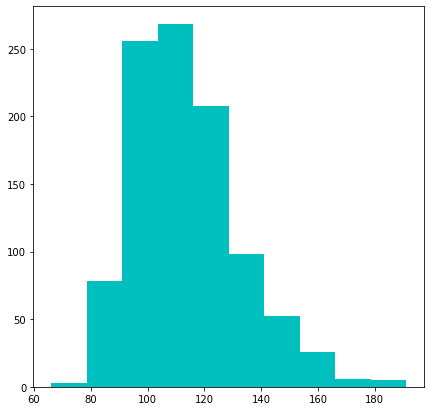

In [13]:
runtimes = df['Runtime (Minutes)']

plt.hist(runtimes, color='c')

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!